In [43]:
import os
import copy

In [44]:
os.chdir("..")

In [45]:
%load_ext autoreload
%autoreload 2

!pwd


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/Users/jaidev/Desktop/UCSD


In [46]:
from dataloader import NeRFDataset

In [47]:
dataset = NeRFDataset("data/lego", phase="test")

FileNotFoundError: [Errno 2] No such file or directory: 'data/lego/transforms_test.json'

# Plot Poses

In [ ]:
all_poses = [dataset[i]["pose"] for i in range(len(dataset))]

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [48]:
def get_rays(height, width, normalized_K, c2w_poses):
    """
    Get the rays for a given image size and camera poses.

    Args:
        height: The height of the image.
        width: The width of the image.
        normalized_K: The normalized camera intrinsics.
        c2w_poses: The camera to world poses.

    Returns:
        ray origins, ray directions
    """

    range_coord = np.linspace(0, 1, width)
    i, j = np.meshgrid(range_coord, range_coord, indexing="xy")
    i, j = i.flatten(), j.flatten()

    directions = np.stack(
        [
            (i - normalized_K[0, 2]) / normalized_K[0, 0],
            -(j - normalized_K[1, 2]) / normalized_K[1, 1],
            -np.ones_like(i),
        ],
        axis=-1,
    )

    points = np.stack([i, j], axis=0)
    points_homo = np.stack([i, j, np.ones_like(i)], axis=0)

    points_cam = np.linalg.inv(normalized_K) @ points_homo

    R = c2w_poses[:3, :3]
    T = c2w_poses[:3, 3]

    ray_origins = T[None, :].repeat(directions.shape[0], 0)
    ray_directions = directions @ R.T

    # Normalzie the ray directions
    return ray_origins, ray_directions

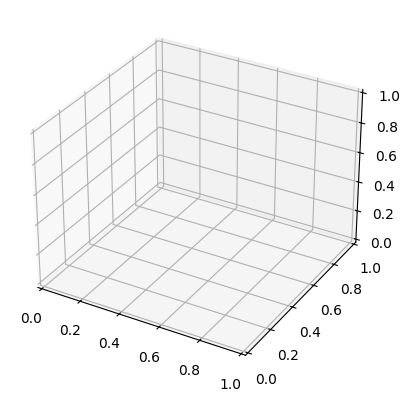

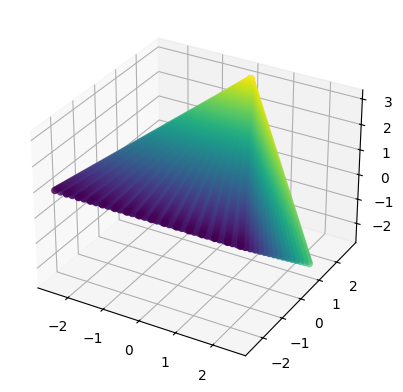

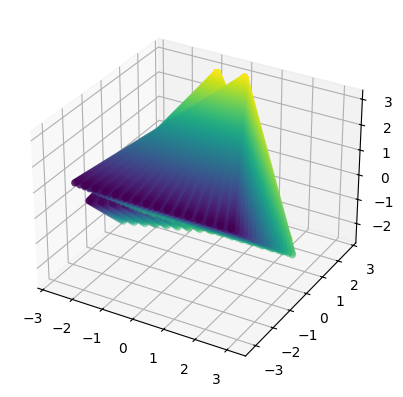

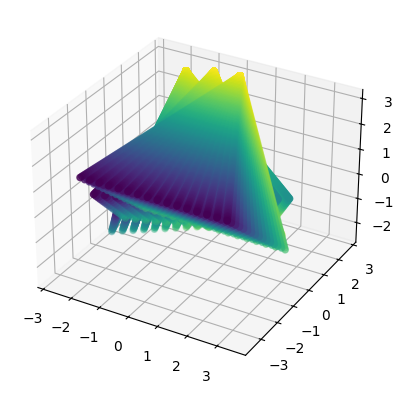

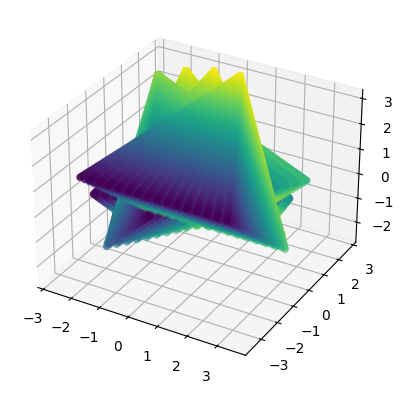

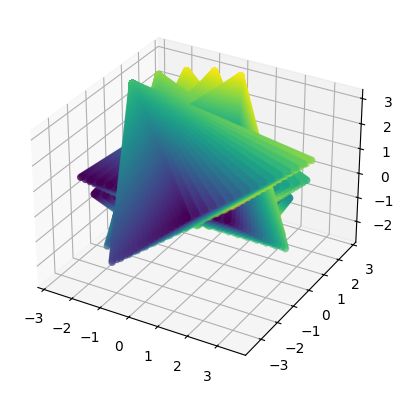

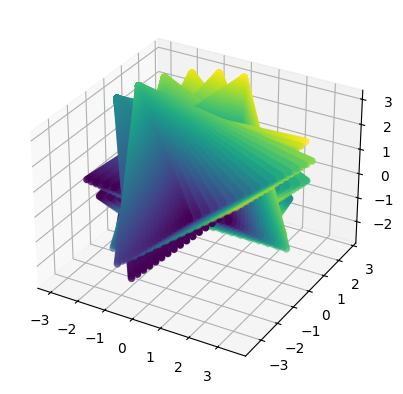

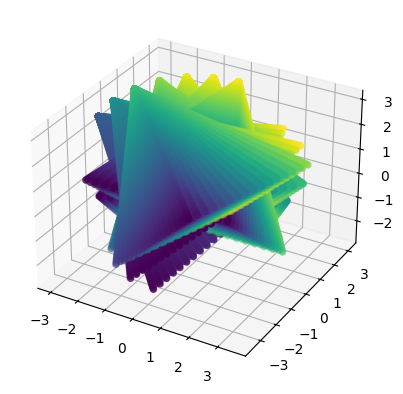

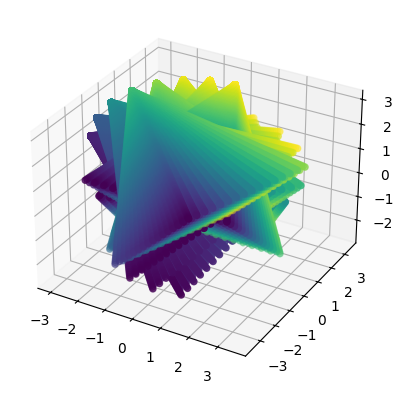

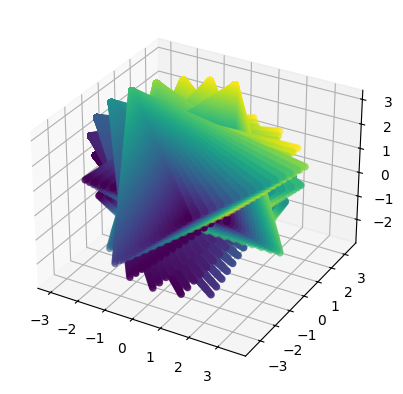

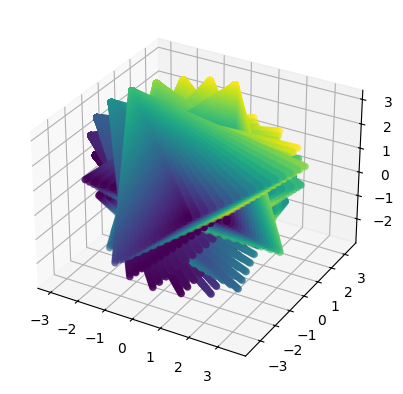

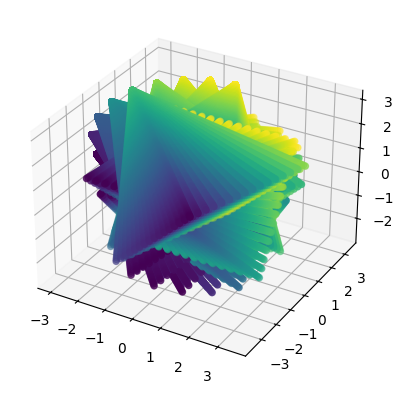

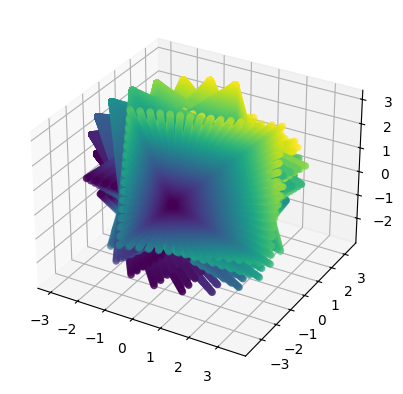

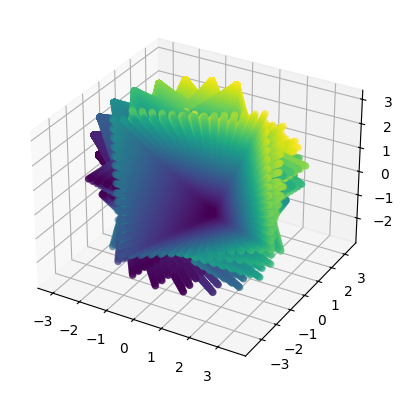

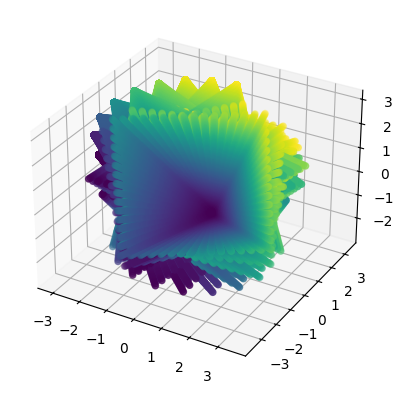

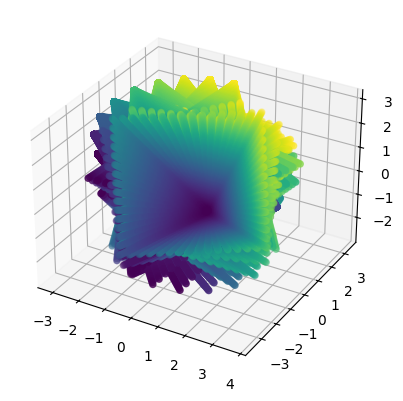

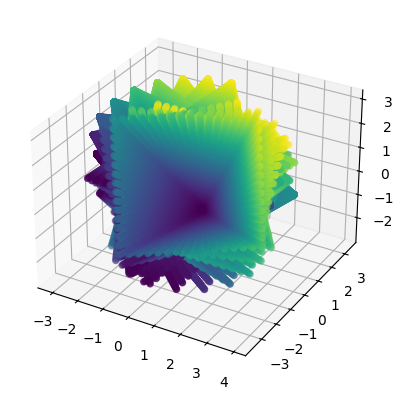

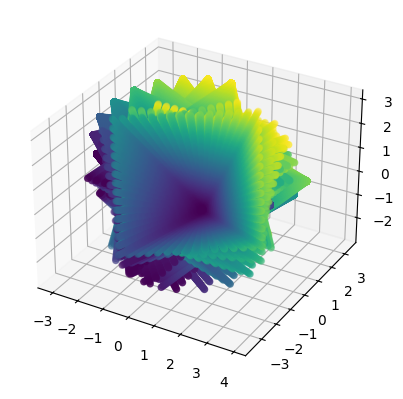

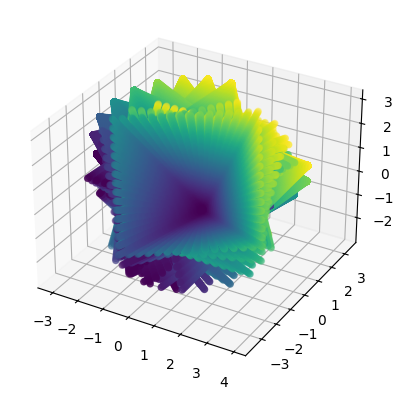

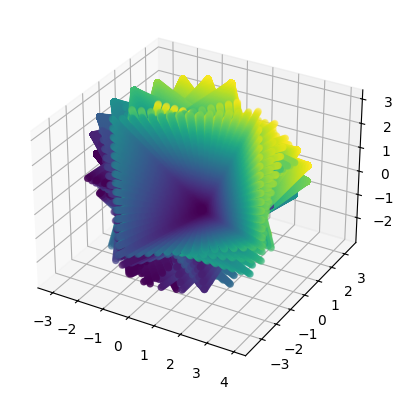

KeyboardInterrupt: 

In [49]:


K = np.array([[1, 0.0, 0.5],
                [0.0, 1, 0.5],
                [0.0, 0.0, 1.0]])

poses = all_poses[::5]

for max_i in range(len(poses)):

    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')

    for idx, pose in enumerate(poses):

        if idx == max_i:
            break
        
        ray_origins, ray_directions = get_rays(16, 16, K, pose)
        ray_lengths = np.linspace(0, 5, 100)


        points = []
        for i, (o, d) in enumerate(zip(ray_origins, ray_directions)):
            for j in range(len(ray_lengths)):
                points.append(o + ray_lengths[j] * d)

        points = np.array(points)
        ax.scatter(points[:, 0], points[:, 1], points[:, 2], c=points[:, 1])
        # break

    plt.show()